## **Definição do problema**

* Construir um modelo que seja capaz de realizar a previsão da taxa média de ocupação de casas em Boston, Estados Unidos. 

* A base de dados a ser utilizada pode ser encontrada no seguinte link:
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

* Segundo o site mencionado, a base de dados é constituída por um total de 14 variáveis, sendo 12 variáveis numéricas e somente 1 variável categórica. Além de possuir 506 linhas de observações de dados. 

* Por se tratar de um problema de previsão e a base de dados possuir uma variável target o objetivo aqui está em construir um algoritmo de regressão linear múltipla para realizar a previsão da taxa média de ocupação das casas pelos proprietários em Boston.



# **Organizando a base de dados e os pacotes utilizados**

In [85]:
# Importando os pacotes utilizados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Removendo os avisos de atenção
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [86]:
# Carregando a base de dados
boston = load_boston()
dataset = pd.DataFrame(boston.data, columns = boston.feature_names)
dataset['target'] = boston.target

In [87]:
# Gerando o número de linhas e variáveis da base de dados
lines = len(dataset)
variables = dataset.columns[:-1]

In [88]:
# Armazenando X e Y
X = dataset.iloc[:, :-1]
y = dataset['target'].values

In [89]:
# Variáveis explanatórias
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [90]:
# Variável Target
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

# **Criando um modelo de Regressão Linear Múltipla com StatsModels**

In [91]:
# Treinando o modelo
Xc = sm.add_constant(X)
modelo = sm.OLS(y, Xc)
modelo_v1 = modelo.fit()

In [92]:
# Métricas do modelo
modelo_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          6.72e-135
Time:                        07:14:49   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### A partir das métricas é possível identificar o seguinte:

1 - Com base na métrica R-Squared obtida é possível afirmar que as variáveis preditivas utilizadas possuem cerca de 74% de responsabilidade sobre a variação do valor da variável target, representando um bom resultado.

2 - Com base na métrica do valor-p individual é possível afirmar que as variáveis INDUS e AGE apontam para uma baixa relação com o valor da variável target neste conjunto de dados pelo fato de que o valor obtido do cálculo do valor-p foi maior que 0.05. 

3 - Cada variável obteve após o treinamento um valor de coeficiente relacionado permitindo com que fosse criado um modelo de regressão linear baseado em todas as variáveis independentes.

Portanto a Matriz de Correlação será criada para permitir visualizar o nível de correlação entre as variáveis.

# **Matriz de Correlação das variáveis**

In [93]:
# Gerando a matriz
X = dataset.iloc[:,:-1]
matriz_corr = X.corr() # Método da correlação
print(matriz_corr)

             CRIM        ZN     INDUS  ...   PTRATIO         B     LSTAT
CRIM     1.000000 -0.200469  0.406583  ...  0.289946 -0.385064  0.455621
ZN      -0.200469  1.000000 -0.533828  ... -0.391679  0.175520 -0.412995
INDUS    0.406583 -0.533828  1.000000  ...  0.383248 -0.356977  0.603800
CHAS    -0.055892 -0.042697  0.062938  ... -0.121515  0.048788 -0.053929
NOX      0.420972 -0.516604  0.763651  ...  0.188933 -0.380051  0.590879
RM      -0.219247  0.311991 -0.391676  ... -0.355501  0.128069 -0.613808
AGE      0.352734 -0.569537  0.644779  ...  0.261515 -0.273534  0.602339
DIS     -0.379670  0.664408 -0.708027  ... -0.232471  0.291512 -0.496996
RAD      0.625505 -0.311948  0.595129  ...  0.464741 -0.444413  0.488676
TAX      0.582764 -0.314563  0.720760  ...  0.460853 -0.441808  0.543993
PTRATIO  0.289946 -0.391679  0.383248  ...  1.000000 -0.177383  0.374044
B       -0.385064  0.175520 -0.356977  ... -0.177383  1.000000 -0.366087
LSTAT    0.455621 -0.412995  0.603800  ...  0.37404

In [94]:
# Criando um gráfico do tipo Correlation Plot com as variáveis independentes
def visualize_correlation_matrix(data, hurdle = 0.0):
    R = np.corrcoef(data, rowvar = 0)
    R[np.where(np.abs(R) < hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap = mpl.cm.coolwarm, alpha = 0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor = False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor = False)
    heatmap.axes.set_xticklabels(variables, minor = False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(variables, minor = False)
    plt.tick_params(axis = 'both', which = 'both', bottom = 'off', top = 'off', left = 'off', right = 'off') 
    plt.colorbar()
    plt.show()

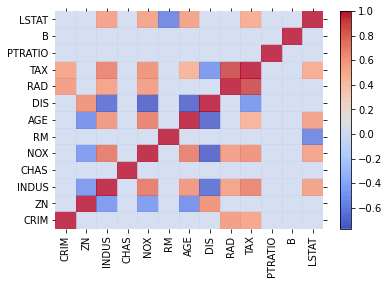

In [95]:
# Visualizando o gráfico criado
visualize_correlation_matrix(X, hurdle = 0.5)

Com base no Correlation Plot gerado é pode-se apontar o seguinte:

* Existe uma correlação positiva entre as variáveis TAX e RAD, ou seja, conforme acontece o aumento de uma delas, a outra também tende a aumentar de valor. Isso é explicado pelo fato da variável TAX representar a taxa de imposto pago pela casa e a variável RAD representar a distância das estradas. Conforme a casa fica mais próxima de uma estrada o valor da taxa aumenta. 

Após a criação do gráfico de correlação a avaliação da existência da multicolinearidade será aplicada. 

# Avaliando a existência de Multicolinearidade

* Autovalores e Autovetores serão utilizados para a avaliação. 

* Autovetores realizam a recombinação da variância entre as variáveis, criando novos recursos acumulando toda a variância compartilhada. Ao aplicar métodos que calculam os autovalores um vetor de autovalores é obtido e este representa a variância recombinada para cada nova variável. Já os autovetores são representados por uma matriz que aponta como as novas variáveis se relacionam com as antigas.

In [96]:
# Gerando os autovalores e autovetores
corr = np.corrcoef(X, rowvar = 0)
autovalores, autovetores = np.linalg.eig(corr)

Após o cálculo dos autovalores ocorrerá uma busca por valores que estejam próximos de zero ou sejam pequenos em comparação com os outros, pois estes apresentam problemas. Os valores próximos de zero podem representar um problema real para métodos de otimização baseados na inversão matricial, enquanto os valores pequenos representam uma fonte elevada de multicolinearidade.

In [97]:
print(autovalores)

[6.12684883 1.43327512 1.24261667 0.85757511 0.83481594 0.65740718
 0.53535609 0.39609731 0.06350926 0.27694333 0.16930298 0.18601437
 0.22023782]


O valor da posição 8 é o menor e será utilizado para avaliar o vetor específico nos autovetores que contém o nível de associaçao com as variáveis originais.

In [98]:
print(autovetores[:,8])

[-0.0459523   0.08091897  0.25107654 -0.03592171 -0.04363045 -0.0455671
  0.03855068  0.01829854  0.63348972 -0.72023345 -0.02339805  0.00446307
 -0.02443168]


Observa-se que os valores nas posições 2,8 e  apresentam um valor em destaque em termos do valor absoluto. 

Agora que já se sabe do indice então aplica-se esse valor no vetor das variáveis para identifica-las.

Então deve-se tormar alguma decisão sobre o que fazer com essas variáveis, tendo como opção a remoção de uma delas, a alteração dos seus valores ou até a inserção de mais dados para melhor apuração.

In [99]:
print(variables[2], variables[8], variables[9])  

INDUS RAD TAX


# **Gradiente Descendente aplicado na Regressão Linear Múltipla**

* Para aplicar o Gradiente Descendente neste problema será necessário realizar a Feature Scaling nas variáveis preditivas, ou seja, aplicar métodos que colocam os valores das variáveis na mesma escala.

* Dentro da aplicação da Feature Scaling está a Padronização e a Normalização.

* A Padronização realiza a divisão da média pelo desvio padrão e obtém uma unidade de variância.

* A Normalização aplica escala aos dados com intervalos de 0 e 1.

Neste caso será utilizado o método da Padronização porque esta técnica ajusta os coeficientes e torna a superfície de erros mais fácil de se tratar.

In [100]:
# Gerando os dados
observations = len(dataset)
variables = dataset.columns

In [101]:
# Aplicando a Padronização nas variáveis preditivas
standardization = StandardScaler()
Xst = standardization.fit_transform(X)

# Escalas utilizadas
original_means = standardization.mean_
original_stds = standardization.scale_

In [102]:
Xst = np.column_stack((Xst, np.ones(observations)))
y = dataset['target'].values

In [103]:
# Cálculo do Gradiente Descendente
import random
import numpy as np

def random_w( p ):
    return np.array([np.random.normal() for j in range(p)])

def hypothesis(X,w):
    return np.dot(X,w)

def loss(X,w,y):
    return hypothesis(X,w) - y

def squared_loss(X,w,y):
    return loss(X,w,y)**2

def gradient(X,w,y):
    gradients = list()
    n = float(len( y ))
    for j in range(len(w)):
        gradients.append(np.sum(loss(X,w,y) * X[:,j]) / n)
    return gradients

def update(X,w,y, alpha = 0.01):
    return [t - alpha*g for t, g in zip(w, gradient(X,w,y))]

def optimize(X,y, alpha = 0.01, eta = 10**-12, iterations = 1000):
    w = random_w(X.shape[1])
    path = list()
    for k in range(iterations):
        SSL = np.sum(squared_loss(X,w,y))
        new_w = update(X,w,y, alpha = alpha)
        new_SSL = np.sum(squared_loss(X,new_w,y))
        w = new_w
        if k>=5 and (new_SSL - SSL <= eta and new_SSL - SSL >= -eta):
            path.append(new_SSL)
            return w, path
        if k % (iterations / 20) == 0:
            path.append(new_SSL)
    return w, path                       

In [104]:
# Resultado obtido
alpha = 0.01
w, path = optimize(Xst, y, alpha, eta = 10**-12, iterations = 20000)
print('Coeficientes finais obtidos e padronizados: ' + ' , '.join(map(lambda x: '%0.4f' % x, w)))

Coeficientes finais obtidos e padronizados: -0.9281 , 1.0816 , 0.1409 , 0.6817 , -2.0567 , 2.6742 , 0.0195 , -3.1040 , 2.6622 , -2.0768 , -2.0606 , 0.8493 , -3.7436 , 22.5328


Após a aplicação e o retorno dos coeficientes obtidos é necessário remover a padronização para avaliar os resultados.

In [105]:
# Removendo a Padronização
unstandardized_betas = w[:-1] / original_stds
unstandardized_bias = w[-1]-np.sum((original_means / original_stds) * w[:-1])

In [106]:
# Resultado final dos coeficientes calculados
print('%8s: %8.4f' % ('bias', unstandardized_bias))
for beta,varname in zip(unstandardized_betas, variables):
  print('%8s: %8.4f' % (varname, beta))

    bias:  36.4595
    CRIM:  -0.1080
      ZN:   0.0464
   INDUS:   0.0206
    CHAS:   2.6867
     NOX: -17.7666
      RM:   3.8099
     AGE:   0.0007
     DIS:  -1.4756
     RAD:   0.3060
     TAX:  -0.0123
 PTRATIO:  -0.9527
       B:   0.0093
   LSTAT:  -0.5248


# **Importância da seleção e feature scaling**

* Ao realizar o treinamento de um modelo deve-se atentar ao fato de que as variáveis preditivas podem não estar na mesma escala, tornando assim o modelo impreciso pois o mesmo resulta em métricas imprecisas. 

* Deve-se portanto aplicar algum método que normalize os dados, seja através da normalização, binarização, padronização, etc. 

OBS: Uma das formas de se avaliar a precisão do modelo criado é através do resultado obtido do cálculo do R2, que representa a porcentagem da influência entre as variáveis utilizadas e a variável target. Quanto maior for este valor, melhor será. 

# **Realizando previsões com o modelo de regressão linear múltipla treinado**


In [107]:
# Importações necessárias
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [108]:
# Carregando o Dataset
boston = load_boston()
dataset = pd.DataFrame(boston.data, columns = boston.feature_names)
dataset['target'] = boston.target

In [109]:
# Demonstrando o formato do Dataset 
print('Boston housing dataset tem {} linhas com {} variáveis cada uma.'.format(*dataset.shape))

Boston housing dataset tem 506 linhas com 14 variáveis cada uma.


In [110]:
# Base de dados até então
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [111]:
# Coletando X e Y, utilizando somente as 4 variáveis explanatórias mais relevantes
X = dataset[['LSTAT', 'RM', 'DIS', 'PTRATIO']]
Y = dataset['target'].values

In [112]:
X.head()

,LSTAT,RM,DIS,PTRATIO
0,4.98,6.575,4.0900,15.3
1,9.14,6.421,4.9671,17.8
2,4.03,7.185,4.9671,17.8
3,2.94,6.998,6.0622,18.7
4,5.33,7.147,6.0622,18.7


In [113]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [114]:
# Dividindo os dados em treino e teste, onde somente 20% da base será utilizada para teste enquanto 80% será de treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [115]:
# Criação do modelo
modelo = LinearRegression(normalize=False, fit_intercept = True)

In [116]:
modelo_v2 = modelo.fit(X_train, y_train)

In [117]:
# Cálculo da métrica R2 obtida pelo modelo
r2_score(y_test, modelo_v2.fit(X_train, y_train).predict(X_test))

0.6347923449246606

Apesar deste modelo apresentar o valor de R2 abaixo do valor obtido tanto pelo StatsModels quanto pelo Gradiente Descendente existe o fato da multicolinearidade existir naqueles modelos, o que implica no mesmo ser tendencioso.

In [118]:
# Realizando a previsão de um exemplo
LSTAT = 4
RM = 6
DIS = 5
PTRATIO = 16

dados_nova_casa = [LSTAT, RM, DIS, PTRATIO]

Xp = np.array(dados_nova_casa).reshape(1,-1)

print('Para este exemplo de casa o resultado da taxa é de: ', modelo_v2.predict(Xp))

Para este exemplo de casa o resultado da taxa é de:  [28.40209604]
